# ADASYN with Imbalance Data

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
Data = pd.read_csv('./Data/train.csv')

In [3]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

In [4]:
y=pd.DataFrame(y)

In [5]:
type(y)

pandas.core.frame.DataFrame

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
headers = X.columns.copy()
headers

Index(['No of Days Stayed', 'Net Amt', 'settlement_delay', 'age', 'Start_year',
       'Start_month', 'Start_week', 'Start_day', 'Start_dayofweek',
       'Reported_year', 'Reported_month', 'Reported_week', 'Reported_day',
       'Reported_dayofweek', 'Commencement_year', 'Commencement_month',
       'Commencement_week', 'Commencement_day', 'Commencement_dayofweek',
       'Termination_year', 'Termination_month', 'Termination_week',
       'Termination_day', 'Termination_dayofweek', 'Benefit Type_MEDICAL',
       'Benefit Type_SURGICAL', 'Claim Status_Cancelled / Rejected',
       'Claim Status_Outstanding', 'Claim Status_Paid',
       'Claim Status_Pre-Auth Approved', 'ClaimEvent_TPA_ID_51381',
       'ClaimEvent_TPA_ID_59682', 'Primary Diagnosis Code_-N',
       'Primary Diagnosis Code_M1', 'Primary Diagnosis Code_M2',
       'Primary Diagnosis Code_M3', 'Primary Diagnosis Code_M4',
       'Primary Diagnosis Code_M5', 'Primary Diagnosis Code_M6',
       'Primary Diagnosis Code_M7', '

0    252147
1     34793
Name: FraudFound, dtype: int64

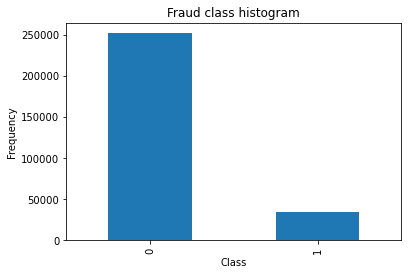

In [8]:
pd.value_counts(y['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y['FraudFound'].value_counts()

In [9]:
X.head()

,No of Days Stayed,Net Amt,settlement_delay,age,Start_year,Start_month,Start_week,Start_day,Start_dayofweek,Reported_year,...,Residence Location_PATHANKOT,Residence Location_PATIALA,Residence Location_RUPNAGAR,Residence Location_S.A.S Nagar,Residence Location_SANGRUR,Residence Location_SRI MUKTSAR SAHIB,Residence Location_Shahid Bhagat Singh Nagar,Residence Location_Tarn Taran,Reject status more than 3 months_0,Reject status more than 3 months_1
0,0.012346,0.089984,0.366211,1.0,1.0,0.272727,0.274510,0.233333,0.333333,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.008230,0.021340,0.445312,1.0,1.0,0.090909,0.098039,0.200000,0.666667,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.024691,0.030730,0.396484,1.0,1.0,0.000000,0.039216,0.433333,0.166667,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.012346,0.042680,0.359375,1.0,1.0,0.000000,0.039216,0.566667,0.833333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.000000,0.005691,0.456055,1.0,0.0,1.000000,0.000000,0.966667,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X = np.array(X)
y = np.array(y)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (286940, 98)
Shape of y: (286940, 1)


In [11]:
type(X)

numpy.ndarray

In [12]:
from imblearn.over_sampling import ADASYN #, SMOTE 
from collections import Counter
from sklearn.svm import LinearSVC

Using TensorFlow backend.


In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

# sm = SMOTE(random_state=2)
X_res, y_res = ADASYN().fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Before OverSampling, counts of label '1': [34793]
Before OverSampling, counts of label '0': [252147] 

After OverSampling, the shape of train_X: (505860, 98)
After OverSampling, the shape of train_y: (505860,) 

After OverSampling, counts of label '1': 253713
After OverSampling, counts of label '0': 252147


In [14]:
# pd.value_counts(y['FraudFound']).plot.bar()
# plt.title('Fraud class histogram')
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# y['FraudFound'].value_counts()

In [15]:
type(X_res)

numpy.ndarray

In [16]:
type(y_res)

numpy.ndarray

In [17]:
X_ADASYN = pd.DataFrame(X_res)
X_ADASYN.columns = headers

In [18]:
type(y_res)

numpy.ndarray

In [19]:
y_ADASYN = pd.DataFrame(y_res)
y_ADASYN.columns = ['FraudFound']
y_ADASYN.head()

,FraudFound
0,1
1,0
2,0
3,0
4,0


In [20]:
X_ADASYN.to_csv(r"./Data/ADASYN/X_ADASYN.csv", index=False)
y_ADASYN.to_csv(r"./Data/ADASYN/y_ADASYN.csv", index=False)

In [21]:
ADASYN = X_ADASYN
ADASYN['FraudFound'] = y_res

In [22]:
ADASYN.to_csv(r"./Data/ADASYN/ADASYN.csv", index=False)